In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
def eucledian_distance(point1, point2):
    dist = 0
    for i in range(len(point1)):
      dist += ((point1[i] - point2[i])**2)
    return np.sqrt(dist)

In [3]:
def train(x, y, z, k):
  distancia = []
  for i in range(x.shape[0]):
    distancia.append(eucledian_distance(z, x[i,]))
  s = np.argsort(distancia)[0:k]
  u = np.bincount(y[s])
  m = []
  max_value = max(u)
  for i, x in enumerate(u):
    if x == max_value:
      m.append(i)  
  while (len(m)>1):
    k = k -1
    s = s[0:k]
    u = np.bincount(y[s])
    m = []
    max_value = max(u)
    for i, x in enumerate(u):
      if x == max_value:
        m.append(i)  
  return m[0]
def vizinhos(x,y,z,k):
  w=[]
  for i in range(z.shape[0]):
    w.append(train(x,y,z[i,],k))
  return w

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
X=iris.data
y=iris.target

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [7]:
knn=vizinhos(X_train,y_train,X_test,k=3)

In [8]:
score = accuracy_score(y_test, knn)
print(score)

0.9777777777777777


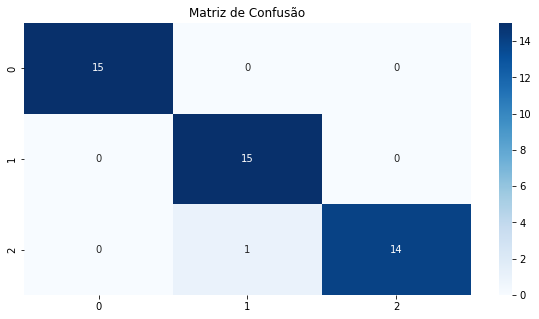

In [11]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
conf = confusion_matrix(y_test, knn)
res = sns.heatmap(conf, annot=True,fmt="d", cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão')
plt.show;

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
!wget -q 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip' -O 'column_data.zip'
!unzip  'column_data.zip' -d '.'

Archive:  column_data.zip
  inflating: ./column_2C.dat         
  inflating: ./column_2C_weka.arff   
  inflating: ./column_3C.dat         
  inflating: ./column_3C_weka.arff   


In [ ]:
df = pd.read_csv('/content/column_3C.dat', sep = ' ',  header=None)
df = df.values

In [ ]:
X_c = df[0:,:6]
y = df[:,-1]

In [ ]:
y

array(['DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH',
       'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH',
       'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH',
       'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH',
       'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH', 'DH',
       'DH', 'DH', 'DH', 'DH', 'DH', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL',
       'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL',
       'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL',
       'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL',
       'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL',
       'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL',
       'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL',
       'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL',
       'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'S

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_c = encoder.fit_transform(y)

In [ ]:
y_c

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
y_c = y_c.astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size = 0.3)

In [ ]:
knn_c=vizinhos(X_train,y_train,X_test,k=3)

In [ ]:
score_c = accuracy_score(y_test, knn_c)
print(score_c)

0.8602150537634409


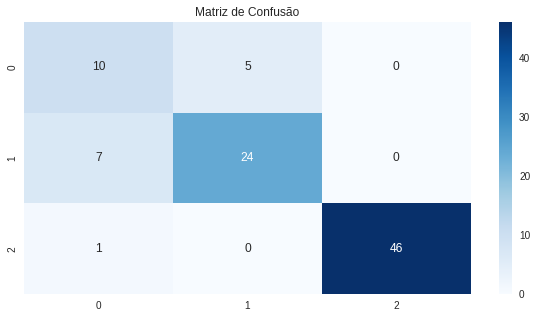

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
conf = confusion_matrix(y_test, knn_c)
res = sns.heatmap(conf, annot=True,fmt="d", cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão')
plt.show;

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, knn_c))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.83      0.77      0.80        31
           2       1.00      0.98      0.99        47

    accuracy                           0.86        93
   macro avg       0.79      0.81      0.80        93
weighted avg       0.87      0.86      0.86        93

